# Qiskit Workflow
1. Go to the [IBM Quantum website](https://quantum-computing.ibm.com/)
2. Create an account or log in.
3. Copy API TOKEN

```
TOKEN = #Paste token as string 
IBMQ.save_account(TOKEN)
```
For an in depth instructtoin see the GitHub page [Qiskit IBM Quantum Provider
](https://github.com/Qiskit/qiskit-ibmq-provider#configure-your-ibm-quantum-credentials).

In [1]:
from qiskit import IBMQ
TOKEN = 'a608bf4f6e87a971d524314cbff23d9b5be9b7d8fc3d6af8c9ed2fefcaddab2174bc7f09fa10c15a8e682f0629c0eca06895d3cc46106c19a6ebe60dbfea6adc'
IBMQ.save_account(TOKEN)

ModuleNotFoundError: No module named 'qiskit'

## Load packages

In [3]:


#from qiskit import IBMQ
#from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble, transpile
#from qiskit.providers.ibmq import least_busy
#from qiskit.visualization import plot_histogram
#from qiskit.circuit.random import random_circuit
#from qiskit.providers.aer import QasmSimulator if we want a simulator

#from numpy import pi
#import numpy as np

AttributeError: partially initialized module 'qiskit' has no attribute '_accelerate' (most likely due to a circular import)

## Connect to a Quantum Computer
1. Load account
2. Get specific provider (*'ibm-q'*)
3. Get least busy backend, in this case with $5$ qubits.

For help see [Access systems with your account](https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)

In [16]:
IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q')
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
back_end = least_busy(small_devices)
backend_name = back_end.name()
backend = provider.get_backend(backend_name)

ibmqfactory.load_account:WARNING:2022-04-15 15:01:57,656: Credentials are already in use. The existing account in the session will be replaced.


<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

### Get name of the least busy qubit.
Run separately from the previous cell

In [26]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.rx(pi/2, qreg_q[0])
circuit.rx(-pi/2, qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

circuit.draw()


┌─────────┐┌──────────┐ ░ ┌─┐
  q: ┤ Rx(π/2) ├┤ Rx(-π/2) ├─░─┤M├
     └─────────┘└──────────┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0

In [ ]:
editor = CircuitComposer(circuit=circuit)
editor

### Execute the circuit on the qasm simulator

In [21]:
job = simulator.run(compiled_circuit, shots=1000)

### Grab results from the job

In [22]:
result = job.result()

### Returns counts

In [23]:
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'0': 1000}


### Draw the circuit


In [24]:
circuit.draw()

┌─────────┐┌──────────┐┌─┐
  q: ┤ Rx(π/2) ├┤ Rx(-π/2) ├┤M├
     └─────────┘└──────────┘└╥┘
c: 1/════════════════════════╩═
                             0

### Plot a histogram

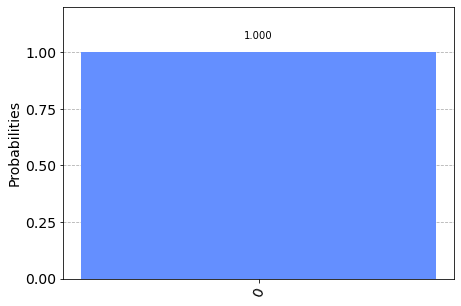

In [25]:
plot_histogram(counts)

The gates are added to the circuit one-by-one to form the Bell state

$$\left|\psi\right\rangle = \frac{\left|00\right\rangle + \left|11\right\rangle}{\sqrt{2}}$$

In [17]:
dir(circuit)

['__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_ancillas',
 '_append',
 '_assign_calibration_parameters',
 '_assign_parameter',
 '_base_name',
 '_calibrations',
 '_check_compatible_regs',
 '_check_dup_param_spec',
 '_check_dups',
 '_clbit_indices',
 '_clbits',
 '_control_flow_scopes',
 '_create_creg',
 '_create_qreg',
 '_data',
 '_global_phase',
 '_increment_instances',
 '_layout',
 '_metadata',
 '_name_update',
 '_parameter_table',
 '_parameters',
 '_peek_previous_instruction_in_scope',
 '_pop_previous_instruction_in_scope',
 '_pop_scope',
 '_push

In [18]:
from qiskit.circuit.exceptions import CircuitError

In [22]:
qr = random_circuit(10, 10, max_operands=3, measure=True)

In [24]:
circ.draw()

┌───┐┌─┐   
q_0: ─■───────────┤ H ├┤M├───
      │ZZ(4.5859) ├───┤└╥┘┌─┐
q_1: ─■───────────┤ H ├─╫─┤M├
                  └───┘ ║ └╥┘
c: 2/═══════════════════╩══╩═
                        0  1

In [35]:
ci = QuantumCircuit(1)
ci.initialize(0)

In [36]:
ci.draw()

┌───────────────┐
q: ┤ Initialize(0) ├
   └───────────────┘